# Downstream analysis of HPLC-Orbitrap data

This notebook replicates the analysis workflow created by Marc Rurik. The workflow wrapped in [KNIME](https://www.knime.org/) nodes can be found [here](http://www.myexperiment.org/workflows/4792.html), and is illustrated in the picture below. The workflow is developed to analyze HPLC-Orbitrap measurements split into separate or alternating m/z scan ranges. The input expects to be OpenMS consensusXML files, generated by the TextExporter in OpenMS. The workflow further combines the scan ranges, filter them ultilizing blank samples and QC measurements, and then performs statistical analysis to retrieve reliable features.

The aim of this notebook is to give an user friendly and interactive environment where you can get on-the-fly information about the progress of your data. After each step of the pipeline, we provide you with live feedback, consisting of informative plots.

<p align="center">
  <img src="http://www.myexperiment.org/workflows/4792/versions/1/previews/full"/>
</p>

Illustration by: Marc Rurik

### Read input files
* Please run the following snippet and insert the paths to your input files containing the low/high mass range

In [1]:
low <- read.table("C:\\Users\\Milos\\Desktop\\reproducing\\alternate\\transformed_KNIME_low.csv", 
                  fill=TRUE, 
                  sep=",",
                  header=TRUE)
high <- read.table("C:\\Users\\Milos\\Desktop\\reproducing\\alternate\\transformed_KNIME_high.csv", 
                  fill=TRUE, 
                  sep=",",
                  header=TRUE)

In [2]:
print("Head and tail of low mass range")
head(low)
tail(low)
print("Head and tail of high mass range")
head(high)
tail(high)

[1] "Head and tail of low mass range"


Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col202,Col203,Col204,Col205,Col206,Col207,Col208,Col209,Col210,Col211
MAP,0,C:/Users/UU/AppData/Local/Temp/2016-09-07_100519_The-big-daddy_17952_1/TOPPAS_tmp/pipeline_OpenMS/003_FeatureFinderMetabo/out/002_CRa_H9M5_M470_Pool_01_alternate_pos_low_mr.featureXML,4267,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MAP,1,C:/Users/UU/AppData/Local/Temp/2016-09-07_100519_The-big-daddy_17952_1/TOPPAS_tmp/pipeline_OpenMS/003_FeatureFinderMetabo/out/003_CRa_H9M5_M470_Pool_02_alternate_pos_low_mr.featureXML,4350,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MAP,2,C:/Users/UU/AppData/Local/Temp/2016-09-07_100519_The-big-daddy_17952_1/TOPPAS_tmp/pipeline_OpenMS/003_FeatureFinderMetabo/out/005_CRa_H9M5_M470_Blank_02_alternate_pos_low_mr.featureXML,3927,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MAP,3,C:/Users/UU/AppData/Local/Temp/2016-09-07_100519_The-big-daddy_17952_1/TOPPAS_tmp/pipeline_OpenMS/003_FeatureFinderMetabo/out/006_CRa_H9M5_M470_H01_K1_alternate_pos_low_mr.featureXML,4307,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MAP,4,C:/Users/UU/AppData/Local/Temp/2016-09-07_100519_The-big-daddy_17952_1/TOPPAS_tmp/pipeline_OpenMS/003_FeatureFinderMetabo/out/007_CRa_H9M5_M470_L01_K2_alternate_pos_low_mr.featureXML,4264,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MAP,5,C:/Users/UU/AppData/Local/Temp/2016-09-07_100519_The-big-daddy_17952_1/TOPPAS_tmp/pipeline_OpenMS/003_FeatureFinderMetabo/out/009_CRa_H9M5_M470_Blank_03_alternate_pos_low_mr.featureXML,3997,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col202,Col203,Col204,Col205,Col206,Col207,Col208,Col209,Col210,Col211
8194,CONSENSUS,320.79320,128.054465994324,5328.57,0,0,0.106416,NA,NA,NA,...,NA,NA,NA,0,NA,NA,NA,NA,0,NA
8195,CONSENSUS,40.72396,144.042934001551,10669.20,0,0,0.124759,NA,NA,NA,...,NA,NA,NA,0,NA,40.72404,144.0429,6078.43,0,0
8196,CONSENSUS,42.65683,89.0083534707451,5822.09,0,0,0.124560,NA,NA,NA,...,NA,NA,NA,0,NA,NA,NA,NA,0,NA
8197,CONSENSUS,110.45890,123.048824655094,3500.60,0,0,0.101707,NA,NA,NA,...,NA,NA,NA,0,NA,NA,NA,NA,0,NA
8198,CONSENSUS,704.71000,102.14014940238,43513.70,0,0,0.105895,NA,NA,NA,...,698.292,102.1402,12688.2,0,0,702.42600,102.1401,14414.10,0,0
8199,CONSENSUS,39.75792,196.154363506471,4906.58,0,0,0.117545,NA,NA,NA,...,NA,NA,NA,0,NA,NA,NA,NA,0,NA


[1] "Head and tail of high mass range"


Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col197,Col198,Col199,Col200,Col201,Col202,Col203,Col204,Col205,Col206
MAP,0,C:/Users/UU/AppData/Local/Temp/2016-09-07_100519_The-big-daddy_17952_1/TOPPAS_tmp/pipeline_OpenMS/003_FeatureFinderMetabo/out/001_CRa_H9M5_M470_Blank_01_alternate_pos_high_mr.featureXML,15839,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MAP,1,C:/Users/UU/AppData/Local/Temp/2016-09-07_100519_The-big-daddy_17952_1/TOPPAS_tmp/pipeline_OpenMS/003_FeatureFinderMetabo/out/002_CRa_H9M5_M470_Pool_01_alternate_pos_high_mr.featureXML,17801,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MAP,2,C:/Users/UU/AppData/Local/Temp/2016-09-07_100519_The-big-daddy_17952_1/TOPPAS_tmp/pipeline_OpenMS/003_FeatureFinderMetabo/out/005_CRa_H9M5_M470_Blank_02_alternate_pos_high_mr.featureXML,14937,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MAP,3,C:/Users/UU/AppData/Local/Temp/2016-09-07_100519_The-big-daddy_17952_1/TOPPAS_tmp/pipeline_OpenMS/003_FeatureFinderMetabo/out/006_CRa_H9M5_M470_H01_K1_alternate_pos_high_mr.featureXML,18258,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MAP,4,C:/Users/UU/AppData/Local/Temp/2016-09-07_100519_The-big-daddy_17952_1/TOPPAS_tmp/pipeline_OpenMS/003_FeatureFinderMetabo/out/008_CRa_H9M5_M470_H14_K1_alternate_pos_high_mr.featureXML,17573,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MAP,5,C:/Users/UU/AppData/Local/Temp/2016-09-07_100519_The-big-daddy_17952_1/TOPPAS_tmp/pipeline_OpenMS/003_FeatureFinderMetabo/out/009_CRa_H9M5_M470_Blank_03_alternate_pos_high_mr.featureXML,15106,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col197,Col198,Col199,Col200,Col201,Col202,Col203,Col204,Col205,Col206
30783,CONSENSUS,528.8558,759.628902945475,15729.90,0,0,0.0909835,NA,NA,NA,...,529.1640,759.6276,15163.60,0,0,534.0042,759.6283,46217.1,0,0
30784,CONSENSUS,626.1360,884.50867693131,16945.10,0,0,0.0665289,NA,NA,NA,...,624.8340,884.5052,20155.30,0,0,630.6420,884.5074,37142.7,0,0
30785,CONSENSUS,668.2470,569.490709081264,8645.73,0,0,0.0944540,NA,NA,NA,...,666.8880,569.4906,10020.00,0,0,667.1580,569.4920,12565.4,0,0
30786,CONSENSUS,626.3010,906.491936111008,11101.10,0,0,0.1062230,NA,NA,NA,...,NA,NA,NA,0,NA,630.6420,906.4915,11463.6,0,0
30787,CONSENSUS,503.9165,743.576225796737,9055.52,0,0,0.0945130,NA,NA,NA,...,506.9706,743.5762,8418.28,0,0,NA,NA,NA,0,NA
30788,CONSENSUS,573.3078,824.651543877865,13796.90,0,0,0.0850217,NA,NA,NA,...,581.3484,824.6526,6436.42,0,0,576.5256,824.6491,12015.5,0,0


* Source .rscripts

In [1]:
source('C:/Users/Milos/Desktop/reproducing/Functions.R')

[1] "The functions were succesfully loaded"


* Parse the files

In [4]:
low_parsed <- Parse(low)
high_parsed <- Parse(high)

* Remove columns that won't be used in the analysis

In [5]:
head(low_parsed)

,mz,rt,002_CRa_H9M5_M470_Pool_01_alternate_pos_low_mr.featureXML,003_CRa_H9M5_M470_Pool_02_alternate_pos_low_mr.featureXML,005_CRa_H9M5_M470_Blank_02_alternate_pos_low_mr.featureXML,006_CRa_H9M5_M470_H01_K1_alternate_pos_low_mr.featureXML,007_CRa_H9M5_M470_L01_K2_alternate_pos_low_mr.featureXML,009_CRa_H9M5_M470_Blank_03_alternate_pos_low_mr.featureXML,010_CRa_H9M5_M470_L03_K3_alternate_pos_low_mr.featureXML,011_CRa_H9M5_M470_C14_K2_alternate_pos_low_mr.featureXML,...,037_CRa_H9M5_M470_Blank_09_alternate_pos_low_mr.featureXML,038_CRa_H9M5_M470_L14_K3_alternate_pos_low_mr.featureXML,039_CRa_H9M5_M470_C03_K2_alternate_pos_low_mr.featureXML,040_CRa_H9M5_M470_L03_K1_alternate_pos_low_mr.featureXML,041_CRa_H9M5_M470_Blank_10_alternate_pos_low_mr.featureXML,042_CRa_H9M5_M470_Pool_06_alternate_pos_low_mr.featureXML,044_CRa_H9M5_M470_L14_K1_alternate_pos_low_mr.featureXML,045_CRa_H9M5_M470_L14_K2_alternate_pos_low_mr.featureXML,046_CRa_H9M5_M470_H03_K3_alternate_pos_low_mr.featureXML,047_CRa_H9M5_M470_Blank_11_alternate_pos_low_mr.featureXML
7785,55.018053688842,573.95,NA,NA,NA,NA,NA,NA,2220.18994140625,NA,...,8783.259765625,NA,NA,NA,NA,NA,NA,NA,6772.740234375,NA
5654,55.0418538981374,566.919466666667,NA,NA,NA,NA,NA,NA,17487.099609375,NA,...,NA,NA,NA,3574.56005859375,6458.25,NA,NA,NA,NA,5303.68994140625
6284,55.0418546450561,537.75225,NA,NA,NA,NA,NA,NA,8910.9404296875,NA,...,NA,NA,NA,7683.830078125,2244.01000976563,NA,NA,NA,NA,8516.5498046875
4163,55.0418547740727,521.62125,NA,NA,NA,5419.83984375,NA,NA,6018.509765625,NA,...,NA,NA,NA,12854.599609375,10305,NA,NA,NA,NA,15439.099609375
6414,55.0418626800408,444.041775,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,1925.11999511719,10511.2001953125,NA,NA,NA,NA,NA
5675,55.0418645991614,467.4084,NA,NA,NA,NA,NA,NA,4923.56005859375,NA,...,NA,NA,NA,NA,9295.6298828125,NA,NA,NA,NA,10789.2998046875


* Rename columns

In [8]:
low_renamed <- renameColumns(low_parsed)
cat("Number of samples existing in the low range: ",length(colnames(low_renamed)), "\n")

high_renamed <- renameColumns(high_parsed)
cat("Number of samples existing in the high range: ",length(colnames(high_renamed)), "\n")

cat("Number of samples existing in both ranges: ",
    length(intersect(colnames(low_renamed),colnames(high_renamed))))

Number of samples existing in the low range:  43 
Number of samples existing in the high range:  42 
Number of samples existing in both ranges:  39

* Concatenate the scan ranges

In [9]:
cat("Samples missing in the low mass range: ", 
    names(high_renamed)[!names(high_renamed) %in% names(low_renamed)], "\n") #low
cat("Samples missing in the high mass range: ", 
    names(low_renamed)[!names(low_renamed) %in% names(high_renamed)]) #high

# Extending the high mass range with the missing samples
missing_high <- names(low_renamed)[!names(low_renamed) %in% names(high_renamed)]
extend_high <- data.frame(matrix(,nrow=nrow(high_renamed), ncol=length(missing_high)))
names(extend_high) <- missing_high
extend_high <- cbind(high_renamed,
                     extend_high)

# Extending the low mass range with the missing samples
missing_low <- names(high_renamed)[!names(high_renamed) %in% names(low_renamed)]
extend_low <- data.frame(matrix(,nrow=nrow(low_renamed), ncol=length(missing_low)))
names(extend_low) <- missing_low
extend_low <- cbind(low_renamed,extend_low)
extend_high <- extend_high[,names(extend_low)]

# Concatenating the scan ranges
full_range <- rbind(extend_low, extend_high)
names(full_range)<-gsub("_",".",names(full_range))

Samples missing in the low mass range:  Blank_01 H14_K1 Blank_05 
Samples missing in the high mass range:  Pool_02 L01_K2 H03_K1 Pool_05

### Blank Filter

In [10]:
blankFilterPassed = 20 #Number of samples the feature has to be present in
full_range <- blankFilter(full_range,blankFilterPassed) 

399 number of features passed 


### ConsensusMap Normalization

In [11]:
full_range_norm <- consensusMapNormalization(full_range)

 [1] "mz"       "rt"       "Pool.01"  "Pool.02"  "Blank.02" "H01.K1"  
 [7] "L01.K2"   "Blank.03" "L03.K3"   "C14.K2"   "C01.K1"   "Blank.04"
[13] "Pool.03"  "H14.K2"   "H01.K2"   "H03.K1"   "C01.K3"   "C14.K3"  
[19] "L03.K2"   "Blank.06" "Pool.04"  "C03.K1"   "H03.K2"   "H14.K3"  
[25] "Blank.07" "L01.K3"   "C14.K1"   "H01.K3"   "Blank.08" "Pool.05" 
[31] "L01.K1"   "C01.K2"   "C03.K3"   "Blank.09" "L14.K3"   "C03.K2"  
[37] "L03.K1"   "Blank.10" "Pool.06"  "L14.K1"   "L14.K2"   "H03.K3"  
[43] "Blank.11" "Blank.01" "H14.K1"   "Blank.05"


Non-normalized columns: 


 [1] "mz"       "rt"       "Blank.02" "Blank.03" "Blank.04" "Blank.06"
 [7] "Blank.07" "Blank.08" "Blank.09" "Blank.10" "Blank.11" "Blank.01"
[13] "Blank.05"


Feature count:


[1] Pool.01: 364
[1] Pool.02: 82
[1] H01.K1: 377
[1] L01.K2: 80
[1] L03.K3: 386
[1] C14.K2: 315
[1] C01.K1: 381
[1] Pool.03: 376
[1] H14.K2: 372
[1] H01.K2: 346
[1] H03.K1: 87
[1] C01.K3: 385
[1] C14.K3: 382
[1] L03.K2: 386
[1] Pool.04: 383
[1] C03.K1: 387
[1] H03.K2: 378
[1] H14.K3: 370
[1] L01.K3: 383
[1] C14.K1: 376
[1] H01.K3: 385
[1] Pool.05: 86
[1] L01.K1: 387
[1] C01.K2: 377
[1] C03.K3: 384
[1] L14.K3: 384
[1] C03.K2: 366
[1] L03.K1: 390
[1] Pool.06: 381
[1] L14.K1: 383
[1] L14.K2: 370
[1] H03.K3: 385
[1] H14.K1: 275


Most features:


[1] L03.K1: 390


Normalization ratios (map with most features / other map):
Method: mean
Outlier: 0.68 < ratio < 1.5


[1] L03.K1 / Pool.01 = 1.08928910927012
[1] L03.K1 / Pool.02 = 1.17832723118759
[1] L03.K1 / H01.K1 = 1.04107503996371
[1] L03.K1 / L01.K2 = 1.12903598273475
[1] L03.K1 / L03.K3 = 1.03683948472117
[1] L03.K1 / C14.K2 = 1.07780443878374
[1] L03.K1 / C01.K1 = 0.963061556890648
[1] L03.K1 / Pool.03 = 1.00711848901558
[1] L03.K1 / H14.K2 = 1.0182715337612
[1] L03.K1 / H01.K2 = 1.06152301081573
[1] L03.K1 / H03.K1 = 1.01502654285714
[1] L03.K1 / C01.K3 = 1.08803333306876
[1] L03.K1 / C14.K3 = 1.09334669707088
[1] L03.K1 / L03.K2 = 0.898088371576557
[1] L03.K1 / Pool.04 = 0.971219473087716
[1] L03.K1 / C03.K1 = 1.09002474234736
[1] L03.K1 / H03.K2 = 0.978076774457934
[1] L03.K1 / H14.K3 = 1.01857067049187
[1] L03.K1 / L01.K3 = 1.04901761220858
[1] L03.K1 / C14.K1 = 1.09793062534627
[1] L03.K1 / H01.K3 = 1.07047912069505
[1] L03.K1 / Pool.05 = 1.12182697238477
[1] L03.K1 / L01.K1 = 1.09010624978688
[1] L03.K1 / C01.K2 = 0.920983887230634
[1] L03.K1 / C03.K3 = 1.07182831045502
[1] L03.K1 / L14

* Plot the log2 intensity distribution before and after normalization

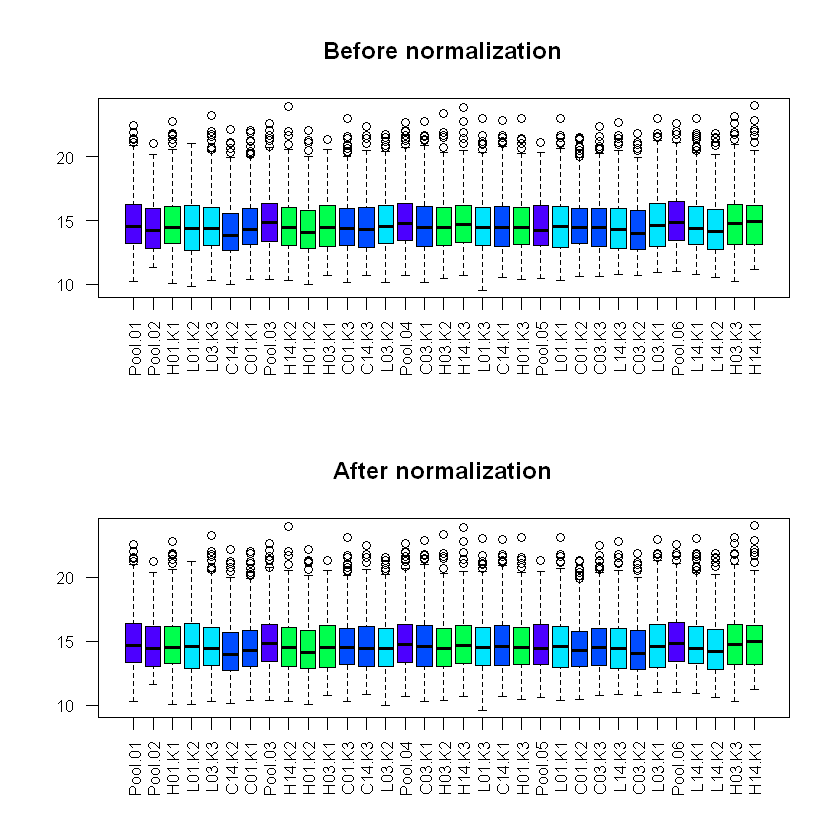

In [12]:
# Boxplots before and after normalization
n <- ncol(data.matrix(full_range[,-which(names(full_range) %in% full_range_norm$ignoredCols)])) + 7

cc <- rep("black", length(names(full_range[,-which(names(full_range) %in% full_range_norm$ignoredCols)])))
cc[grep("Pool", names(full_range[,-which(names(full_range) %in% full_range_norm$ignoredCols)]))] <- topo.colors(5)[1]
cc[grep("C", names(full_range[,-which(names(full_range) %in% full_range_norm$ignoredCols)]))] <- topo.colors(5)[2]
cc[grep("L", names(full_range[,-which(names(full_range) %in% full_range_norm$ignoredCols)]))] <- topo.colors(5)[3]
cc[grep("H", names(full_range[,-which(names(full_range) %in% full_range_norm$ignoredCols)]))] <- topo.colors(5)[4]

par(mfrow=c(2,1),oma = c(0, 0, 0, 0))
boxplot(log2(data.matrix(full_range[,-which(names(full_range) %in% full_range_norm$ignoredCols)])), 
        main="Before normalization",
        col=cc,las=2, cex.axis=0.8)
boxplot(log2(data.matrix(full_range_norm$df[,-which(names(full_range_norm$df) %in% full_range_norm$ignoredCols)])), 
        main="After normalization",
        col=cc, las=2, cex.axis=0.8)
par(mfrow=c(1,1))

In [16]:
head(full_range)
head(full_range_norm$df)

,mz,rt,Pool.01,Pool.02,Blank.02,H01.K1,L01.K2,Blank.03,L03.K3,C14.K2,...,L03.K1,Blank.10,Pool.06,L14.K1,L14.K2,H03.K3,Blank.11,Blank.01,H14.K1,Blank.05
712,62.0239318918682,42.65704875,16140.5,15609.2001953125,NA,21198.099609375,15190.7998046875,NA,24647.80078125,26306.900390625,...,22416.69921875,NA,25208.69921875,17198.099609375,23959,30239.099609375,NA,NA,NA,NA
713,62.0601584853407,47.4887748387097,10214.7001953125,8620.3095703125,NA,13054,7253.27978515625,NA,10014.5,7460.14013671875,...,10149.2998046875,NA,9552.6201171875,10845.099609375,9779.5400390625,9602.1298828125,NA,NA,NA,NA
716,64.0158880576918,45.5561178947368,57882.8984375,43353,5723.18994140625,28183.30078125,65687.1015625,3016.330078125,48044.6015625,42436.5,...,39669.8984375,NA,45387.6015625,35494.5,38717.6015625,30159.5,NA,NA,NA,NA
761,71.0291595196379,42.6571151351351,60555.3984375,55938.3984375,NA,61958.6015625,61907.5,4892.2998046875,79584.703125,92068.8984375,...,82708.6015625,NA,83737.296875,61751.30078125,80694.203125,100121,NA,NA,NA,NA
795,73.5318403862944,42.6571168421053,91739.796875,90443.296875,7529.31982421875,104276,97930.796875,7592.02978515625,131104,147737,...,133079,NA,128848,93771.3984375,119503,187634,NA,NA,NA,NA
796,74.0236917045672,47.488775625,47201.80078125,46736.80078125,NA,50628.6015625,54791.6015625,NA,66483.203125,71014,...,71762,NA,51586.6015625,67929.5,76926.5,6910.35009765625,NA,NA,NA,NA


mz,rt,Pool.01,Pool.02,Blank.02,H01.K1,L01.K2,Blank.03,L03.K3,C14.K2,...,L03.K1,Blank.10,Pool.06,L14.K1,L14.K2,H03.K3,Blank.11,Blank.01,H14.K1,Blank.05
62.0239318918682,42.65704875,17581.67,18392.75,NA,22068.81,17150.960,NA,25555.81,28353.694,...,22416.7,NA,24432.071,18230.74,24890.35,30802.503,NA,NA,NA,NA
62.0601584853407,47.4887748387097,11126.76,10157.55,NA,13590.19,8189.214,NA,10383.43,8040.572,...,10149.3,NA,9258.323,11496.28,10159.70,9781.033,NA,NA,NA,NA
64.0158880576918,45.5561178947368,63051.21,51084.02,5723.18994140625,29340.93,74163.101,3016.330078125,49814.54,45738.248,...,39669.9,NA,43989.302,37625.72,40222.65,30721.420,NA,NA,NA,NA
71.0291595196379,42.6571151351351,65962.34,65913.74,NA,64503.55,69895.795,4892.2998046875,82516.56,99232.267,...,82708.6,NA,81157.522,65459.08,83830.99,101986.417,NA,NA,NA,NA
73.5318403862944,42.6571168421053,99931.16,106571.80,7529.31982421875,108559.14,110567.393,7592.02978515625,135933.80,159231.594,...,133079.0,NA,124878.456,99401.78,124148.39,191129.926,NA,NA,NA,NA
74.0236917045672,47.488775625,51416.41,55071.25,NA,52708.17,61861.690,NA,68932.41,76539.204,...,71762.0,NA,49997.324,72008.24,79916.83,7039.101,NA,NA,NA,NA


### Filtering on pools, RSD and biological replicates

In [18]:
full_range_filt <- QAFilter(full_range_norm$df)
cat(nrow(full_range_filt), "number of features left")

70 number of features left

### Handle missing values

In [26]:
full_range_imputed <- missingValues(full_range_filt)

In [37]:
cat("Number of detected features: ", nrow(full_range_imputed))

Number of detected features:  399

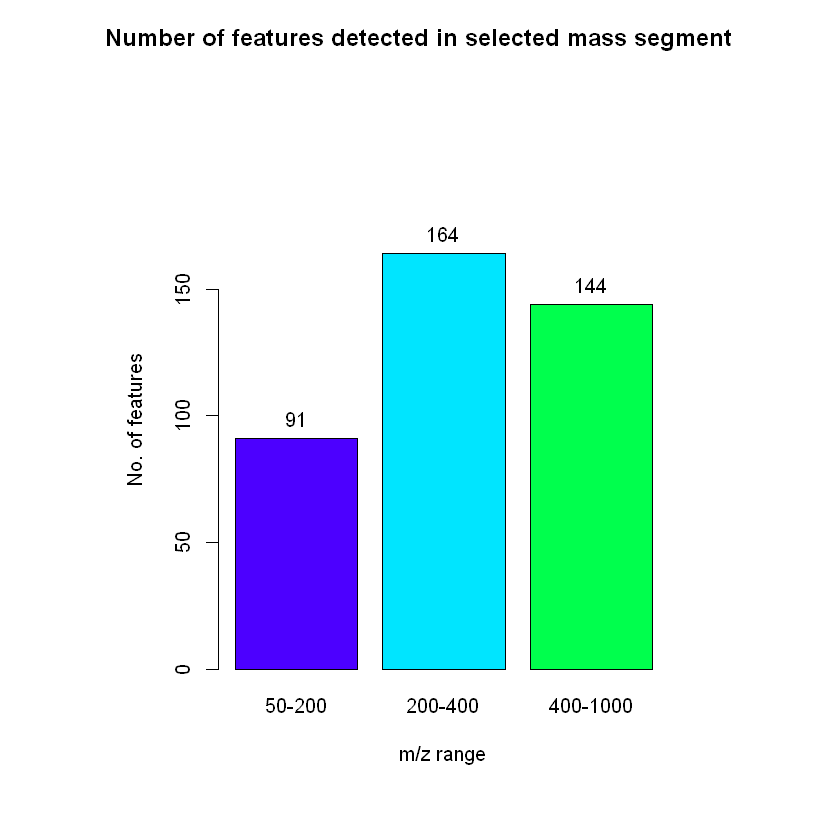

In [35]:
low_mass <- sum(as.numeric(full_range_imputed$mz)<200)
mid_mass <- sum(as.numeric(full_range_imputed$mz)>200 & as.numeric(full_range_imputed$mz)<400)
high_mass <- sum(as.numeric(full_range_imputed$mz)>400 & as.numeric(full_range_imputed$mz)<1000)

data <- data.frame(x=c("50-200", "200-400", "400-1000"), 
                   y=c(low_mass,mid_mass,high_mass))
#data$y <- c(70,138,89)
ylimit <- c(0, 1.2*max(data$y))
par(oma=c(2,5,3,5))
xx <- barplot(data$y, 
              names.arg=data$x, 
              ylim=ylimit,
              ylab="No. of features", 
              xlab="m/z range",
              col=topo.colors(6))
text(x=xx,
     y=data$y,
     label=data$y,
     pos = 3)
title("Number of features detected in selected mass segment", outer = TRUE)

#pie(data$y, col=topo.colors(6))

### Statistical Analysis

In [29]:
stat_features <- statisticalAnalysis(full_range_imputed)

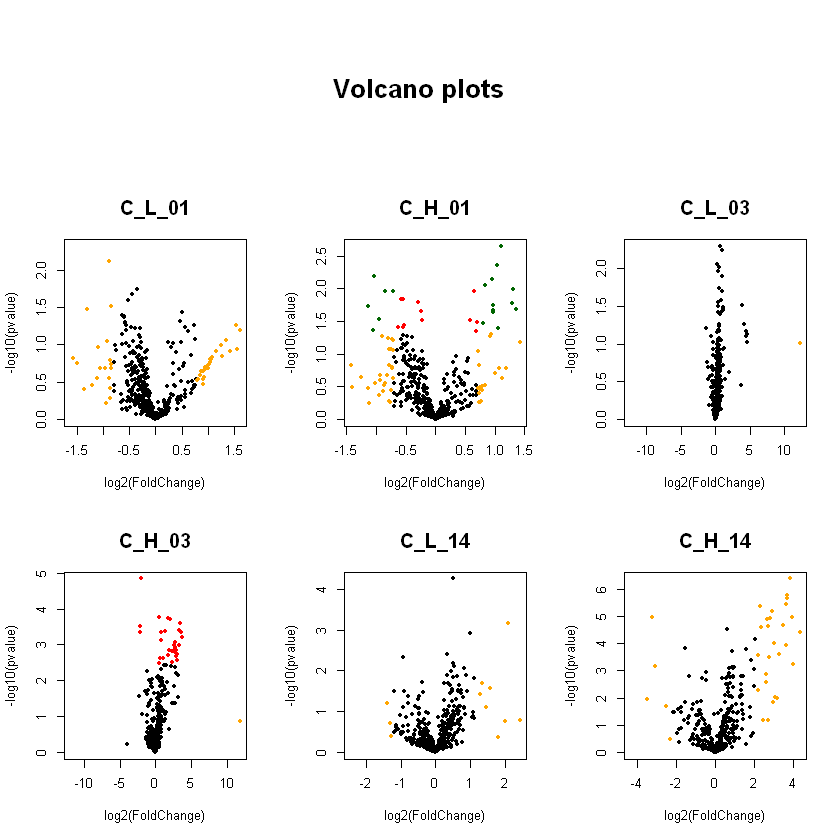

In [30]:
source('~/Klinisk farm/R scripts/multiplot.R')
FoldChange <- data.frame(stat_features[,grep("fc", names(stat_features))])
pvalues <- data.frame(stat_features[,grep("pval", names(stat_features))])
header <- gsub("_pval", "",names(pvalues))
par(mfrow=c(2,length(FoldChange)/2), oma= c(0,0,11,0), cex.main= 2)
for (i in 1:length(FoldChange)) {
    plot(log2(FoldChange[,i]),
         -log10(pvalues[,i]),
         pch=20, 
         xlim=c(-max(log2(FoldChange[,i])),max(log2(FoldChange[,i]))), 
         main = header[i],
         cex.main= 1.5,
         xlab = "log2(FoldChange)", 
         ylab = "-log10(pvalue)")
    
    fc <- which(abs(log2(FoldChange[,i]))>max(log2(FoldChange[,i]))/2)
    p <- which(-log10(pvalues[,i])>max(-log10(pvalues[,i]))/2)
    fc_p <- intersect(fc,p)
    
    points(log2(FoldChange[fc,i]),    # orange = high fold change 
           -log10(pvalues[fc,i]), 
           col="orange", pch=20)
    
    points(log2(FoldChange[p,i]),     # red = low p-value
           -log10(pvalues[p,i]), 
           col="red", pch=20)
    
    points(log2(FoldChange[fc_p,i]),  # green = high fold change and low p_value
           -log10(pvalues[fc_p,i]), 
           col="darkgreen", pch=20)         
}
title("Volcano plots", outer=TRUE) 

### Export result as .csv

In [25]:
write.csv(stat_features,"C:\\Users\\Milos\\Desktop\\reproducing\\alternate\\realiable_features.csv", row.names = F)